In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
# 기본
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
import matplotlib.pyplot as plt

In [3]:
df=pd.read_pickle('/content/drive/MyDrive/NA1/source_code/dataset/pkl/dev_df_v0423(only_dev).pkl') # 토요일과 진행한 데이터셋과 달라 결론이 달라질 수 있음
df.head() 

,R6M_CON_IMP_CNT,R6M_CON_IMP_AMT,R6M_CON_NUMB_OF_INSPECTION,R6M_CON_NUMB_OF_DETECTED,R6M_CON_RATIO_OF_DETECTED,R6M_CODE_IMP_CNT,R6M_CODE_IMP_AMT,R6M_CODE_NUMB_OF_INSPECTION,R6M_CODE_NUMB_OF_DETECTED,R6M_CODE_RATIO_OF_DETECTED,R6M_COUNTRY_IMP_CNT,R6M_COUNTRY_IMP_AMT,R6M_COUNTRY_NUMB_OF_INSPECTION,R6M_COUNTRY_NUMB_OF_DETECTED,R6M_COUNTRY_RATIO_OF_DETECTED,R6M_REP_IMP_CNT,R6M_REP_IMP_AMT,R6M_REP_NUMB_OF_INSPECTION,R6M_REP_NUMB_OF_DETECTED,R6M_REP_RATIO_OF_DETECTED,C_MONTH,A_HOUR,CON_ILLEGAL_RATIO,LABEL
0,3,2400297.69,0,0,0.0,0,0.00,0,0,0.0,9360,1.564832e+10,0,0,0.0,2695,5.754773e+09,0,0,0.0,2,11,0.0,0
1,3,2400297.69,0,0,0.0,0,0.00,0,0,0.0,9360,1.564832e+10,0,0,0.0,2695,5.754773e+09,0,0,0.0,2,11,0.0,0
2,3,2400297.69,0,0,0.0,0,0.00,0,0,0.0,9360,1.564832e+10,0,0,0.0,2695,5.754773e+09,0,0,0.0,2,11,0.0,0
3,6,4187322.72,0,0,0.0,49,11201243.85,0,0,0.0,72,1.404721e+07,0,0,0.0,2695,5.754773e+09,0,0,0.0,2,15,0.0,0
4,6,4187322.72,0,0,0.0,49,11201243.85,0,0,0.0,72,1.404721e+07,0,0,0.0,2695,5.754773e+09,0,0,0.0,2,15,0.0,0


In [4]:
df.info() # 2146508, 딥러닝하기에는 적지 않은 데이터 수이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146508 entries, 0 to 2146507
Data columns (total 24 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   R6M_CON_IMP_CNT                 int64  
 1   R6M_CON_IMP_AMT                 float64
 2   R6M_CON_NUMB_OF_INSPECTION      int64  
 3   R6M_CON_NUMB_OF_DETECTED        int64  
 4   R6M_CON_RATIO_OF_DETECTED       float64
 5   R6M_CODE_IMP_CNT                int64  
 6   R6M_CODE_IMP_AMT                float64
 7   R6M_CODE_NUMB_OF_INSPECTION     int64  
 8   R6M_CODE_NUMB_OF_DETECTED       int64  
 9   R6M_CODE_RATIO_OF_DETECTED      float64
 10  R6M_COUNTRY_IMP_CNT             int64  
 11  R6M_COUNTRY_IMP_AMT             float64
 12  R6M_COUNTRY_NUMB_OF_INSPECTION  int64  
 13  R6M_COUNTRY_NUMB_OF_DETECTED    int64  
 14  R6M_COUNTRY_RATIO_OF_DETECTED   float64
 15  R6M_REP_IMP_CNT                 int64  
 16  R6M_REP_IMP_AMT                 float64
 17  R6M_REP_NUMB_OF_INSPECTION 

In [5]:
from sklearn.preprocessing import StandardScaler # 특성마다 범위가 다르면 정규화를 꼭 해야 한다.
X=df.drop('LABEL', axis=1)
y=df['LABEL']
scaler=StandardScaler()
X_ss=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=0,stratify=y)

In [7]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


1717206
429302
1717206
429302


# 결론

loss : 0.013 \
preicision : 0.761


---

units = 64
층 3개
optimizer='adam' \
- RMSProp와 Momentum 기법을 합친 optimizer

epochs =3 또는 4(큰 차이는 없음)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras

# 결과
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Precision()])

model.fit(X_train, y_train, batch_size=512, epochs=4) # 3 또는 4

loss, precision = model.evaluate(X_test, y_test)
print()
print(f'loss : {loss:.3f}')
print(f'preicision : {precision:.3f}')

Epoch 1/4
3354/3354 [==============================] - 7s 2ms/step - loss: 0.0404 - precision_7: 0.4785
Epoch 2/4
3354/3354 [==============================] - 7s 2ms/step - loss: 0.0172 - precision_7: 0.7243
Epoch 3/4
3354/3354 [==============================] - 7s 2ms/step - loss: 0.0157 - precision_7: 0.7496
Epoch 4/4
13416/13416 [==============================] - 14s 1ms/step - loss: 0.0134 - precision_7: 0.7615

loss : 0.013
preicision : 0.761


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras

# 결과
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Precision()])

model.fit(X_train, y_train, batch_size=512, epochs=3) # 3 또는 4

loss, precision = model.evaluate(X_test, y_test)
print()
print(f'loss : {loss:.3f}')
print(f'preicision : {precision:.3f}')

Epoch 1/3
3354/3354 [==============================] - 7s 2ms/step - loss: 0.0377 - precision_8: 0.5051
Epoch 2/3
3354/3354 [==============================] - 7s 2ms/step - loss: 0.0174 - precision_8: 0.7354
Epoch 3/3
13416/13416 [==============================] - 14s 994us/step - loss: 0.0144 - precision_8: 0.7045

loss : 0.014
preicision : 0.704


# Keras

[사전 개념 정리]
1. epochs
- 인공신경망에서 전체 제이터에 대해 순전파/역전파가 끝난 상태
- 너무 많거나 적으면 과적합/과소 적합

2. batch_size
- 몇개 단위 데이터로 매개 변수를 업데이트 할지( 예시. 문제지에서 몇 개씩 문제를 풀고 정답지를 확인할 거니?)
- 이 단계에서 실제값과 예측값으로부터 오차를 계산하고 옵티마이저가 매개변수를 업데이트한다.

3. iteration
- 에포크를 끝내기 위해 필요한 배치의 수
- 예컨대, 전체 데이터가 2,000일 때 배치 크기를 200으로 준다면 배치의 수는 10 이다. -> 10 = iteration, SGD를 예로 들자면 모든 이터레이션마다 하나의 데이터를 선택하여 경사하강법을 수행한다.
- 한번의 에포크 내에서 일어나는 매개변수 업데이트의 수

## Keras 기본 1 

- 3개 층
- units 16

------------------------------------------------------------------------------

- 옵티마이저(최적화 알고리즘) 비교:
  
  ''' 딥러닝에서는 손실 함수의 형태가 복잡하므로 계산량이 매우 커지고, 미분이 0이 되는 값이 여러 개 존재하게 되므로 미분만으로 최소값을 찾기 어렵다. 이런 경우 경사하강법(Gradient Desent Method)과 같은 최적화 방법을 이용한다. 경사하강법은 손실 함수의 현재 위치에서 조금씩 손실이 낮아지는 쪽으로 가중치를 이동하면서 최소값을 찾는 방법이다. \
  \
손실 함수를 최소화하는 방향으로 가중치를 갱신하는 알고리즘을 옵티마이저(Optimizer)라고 부른다. 경사하강법에 기반을 둔 옵티마이저로는 SGD, RMSProp, Adagrad, Adam 등이 있다.'''
  
- 옵티마이저 종류_시각화 포함 상세 내용(https://onevision.tistory.com/entry/Optimizer-%EC%9D%98-%EC%A2%85%EB%A5%98%EC%99%80-%ED%8A%B9%EC%84%B1-Momentum-RMSProp-Adam)

- 옵티마이저 종류_간단 정리(https://blog.naver.com/youjaeah/222218660537)



    - rmsprop : Adagrad의 문제점을 개선하기 위해, 가장 최근 반복에서 비롯된 그레디언트만 누적시키는 방법이다. 
    학습이 진행됨에 따라 파라미터 사이 차별화는 유지하되, 학습 속도가 지속적으로 줄어들어 0이 되는 것을 방지한다.
    - sgd : 확률적 경사 하강법은 매개변수 값을 조정 시 전체 데이터가 아니라 
    랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법
    - adam(Adaptive Moment Estimation) : RMSProp와 Momentum 기법을 합친 optimizer

### adam 옵티마이저

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
import graphviz

model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Precision()])

In [ ]:
# 학습
history = model.fit(X_train, 
                    y_train, 
                    batch_size=512, 
                    epochs=20,
                    validation_data=(X_test, y_test))

Epoch 1/20
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0747 - precision: 0.0066 - val_loss: 0.0193 - val_precision: 0.7566
Epoch 2/20
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0188 - precision: 0.7042 - val_loss: 0.0181 - val_precision: 0.6914
Epoch 3/20
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0180 - precision: 0.7044 - val_loss: 0.0175 - val_precision: 0.6497
Epoch 4/20
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0175 - precision: 0.6984 - val_loss: 0.0169 - val_precision: 0.6898
Epoch 5/20
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0165 - precision: 0.7096 - val_loss: 0.0165 - val_precision: 0.7555
Epoch 6/20
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0165 - precision: 0.7055 - val_loss: 0.0162 - val_precision: 0.6700
Epoch 7/20
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0160 - precision: 0.7018 - val_loss: 0.0157 - 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'precision', 'val_loss', 'val_precision'])

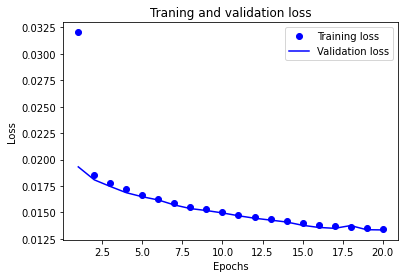

In [ ]:
# 훈련과 검증 손실 그래프
history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

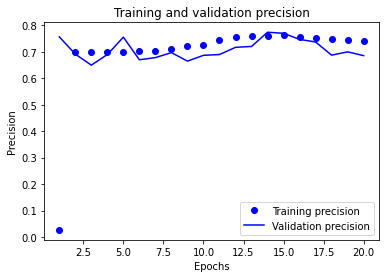

In [ ]:
# 훈련과 검증 pricision 그래프
plt.clf()
precision = history_dict['precision']
val_precision = history_dict['val_precision']
plt.plot(epochs, precision, 'bo', label='Training precision')
plt.plot(epochs, val_precision, 'b', label = 'Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

### rmsprop 옵티마이저

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD #
import graphviz

model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=[tf.keras.metrics.Precision()])

In [ ]:
# 학습
history = model.fit(X_train, 
                    y_train, 
                    batch_size=512, 
                    epochs=20,
                    validation_data=(X_test, y_test))

Epoch 1/20
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0711 - precision_4: 0.1657 - val_loss: 0.0191 - val_precision_4: 0.6445
Epoch 2/20
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0188 - precision_4: 0.7089 - val_loss: 0.0186 - val_precision_4: 0.7024
Epoch 3/20
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0187 - precision_4: 0.7147 - val_loss: 0.0181 - val_precision_4: 0.6931
Epoch 4/20
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0179 - precision_4: 0.7391 - val_loss: 0.0179 - val_precision_4: 0.6371
Epoch 5/20
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0177 - precision_4: 0.7306 - val_loss: 0.0173 - val_precision_4: 0.6991
Epoch 6/20
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0174 - precision_4: 0.7315 - val_loss: 0.0174 - val_precision_4: 0.6895
Epoch 7/20
3354/3354 [==============================] - 5s 2ms/step - loss: 0.0172 - precision_4: 0.

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                384       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'precision_4', 'val_loss', 'val_precision_4'])

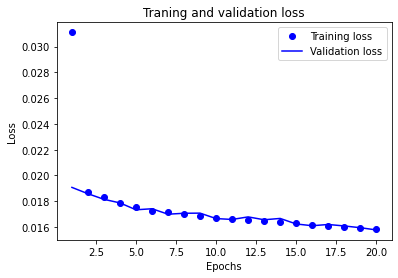

In [ ]:
# 훈련과 검증 손실 그래프
history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

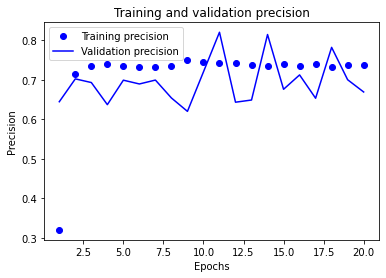

In [ ]:
# 훈련과 검증 pricision 그래프
plt.clf()
precision = history_dict['precision_4']
val_precision = history_dict['val_precision_4']
plt.plot(epochs, precision, 'bo', label='Training precision')
plt.plot(epochs, val_precision, 'b', label = 'Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show() 

## keras 기본 2

- 3개 층
- units 64

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
import graphviz

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Precision()])

In [ ]:
# 학습
history = model.fit(X_train, 
                    y_train, 
                    batch_size=512, 
                    epochs=20,
                    validation_data=(X_test, y_test))

Epoch 1/20
3354/3354 [==============================] - 9s 2ms/step - loss: 0.0441 - precision_1: 0.2937 - val_loss: 0.0177 - val_precision_1: 0.6972
Epoch 2/20
3354/3354 [==============================] - 8s 2ms/step - loss: 0.0172 - precision_1: 0.7399 - val_loss: 0.0160 - val_precision_1: 0.7377
Epoch 3/20
3354/3354 [==============================] - 8s 2ms/step - loss: 0.0155 - precision_1: 0.7737 - val_loss: 0.0142 - val_precision_1: 0.7881
Epoch 4/20
3354/3354 [==============================] - 8s 2ms/step - loss: 0.0141 - precision_1: 0.7947 - val_loss: 0.0133 - val_precision_1: 0.8299
Epoch 5/20
3354/3354 [==============================] - 8s 2ms/step - loss: 0.0128 - precision_1: 0.8189 - val_loss: 0.0125 - val_precision_1: 0.8118
Epoch 6/20
3354/3354 [==============================] - 8s 2ms/step - loss: 0.0121 - precision_1: 0.8220 - val_loss: 0.0115 - val_precision_1: 0.8639
Epoch 7/20
3354/3354 [==============================] - 8s 2ms/step - loss: 0.0115 - precision_1: 0.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1536      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,761
Trainable params: 5,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'precision_1', 'val_loss', 'val_precision_1'])

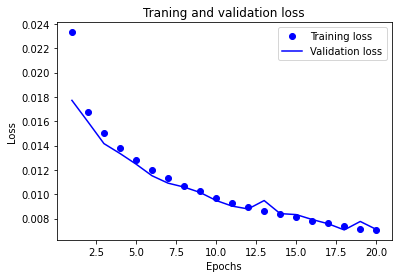

In [ ]:
# 훈련과 검증 손실 그래프
history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

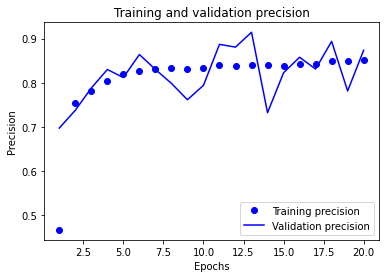

In [ ]:
# 훈련과 검증 pricision 그래프
plt.clf()
precision = history_dict['precision_1']
val_precision = history_dict['val_precision_1']
plt.plot(epochs, precision, 'bo', label='Training precision')
plt.plot(epochs, val_precision, 'b', label = 'Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

## keras 기본 3

- 3개 층
- units 256

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
import graphviz

model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Precision()])

In [ ]:
# 학습
history = model.fit(X_train, 
                    y_train, 
                    batch_size=512, 
                    epochs=20,
                    validation_data=(X_test, y_test))

Epoch 1/20
3354/3354 [==============================] - 26s 8ms/step - loss: 0.0276 - precision_2: 0.5396 - val_loss: 0.0167 - val_precision_2: 0.6218
Epoch 2/20
3354/3354 [==============================] - 25s 8ms/step - loss: 0.0158 - precision_2: 0.7170 - val_loss: 0.0135 - val_precision_2: 0.7881
Epoch 3/20
3354/3354 [==============================] - 25s 7ms/step - loss: 0.0130 - precision_2: 0.7777 - val_loss: 0.0110 - val_precision_2: 0.8274
Epoch 4/20
3354/3354 [==============================] - 25s 8ms/step - loss: 0.0109 - precision_2: 0.8003 - val_loss: 0.0101 - val_precision_2: 0.7890
Epoch 5/20
3354/3354 [==============================] - 25s 8ms/step - loss: 0.0093 - precision_2: 0.8106 - val_loss: 0.0085 - val_precision_2: 0.8386
Epoch 6/20
3354/3354 [==============================] - 25s 8ms/step - loss: 0.0083 - precision_2: 0.8198 - val_loss: 0.0073 - val_precision_2: 0.8547
Epoch 7/20
3354/3354 [==============================] - 26s 8ms/step - loss: 0.0073 - precisio

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               6144      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 72,193
Trainable params: 72,193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'precision_2', 'val_loss', 'val_precision_2'])

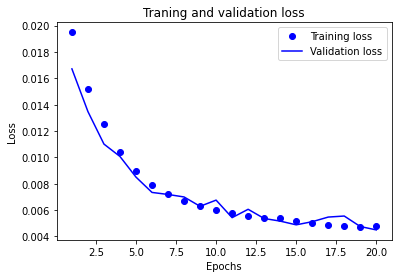

In [ ]:
# 훈련과 검증 손실 그래프
history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

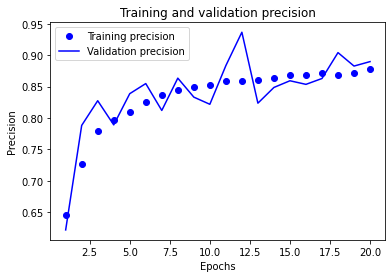

In [ ]:
# 훈련과 검증 pricision 그래프
plt.clf()
precision = history_dict['precision_2']
val_precision = history_dict['val_precision_2']
plt.plot(epochs, precision, 'bo', label='Training precision')
plt.plot(epochs, val_precision, 'b', label = 'Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show() 

# dropout

신경망을 위해 사용되는 규제 기법 중에서 가장 효과적이고 널리 사용되는 방법 중 하나.

네트워크 층에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 출력 특성을 제외시킨다.(0으로 만듬) 각 샘플에 대해 뉴런의 일부를 무작위하게 제거하면 뉴런의 부정한 협업을 방지하고 결국 과대적합을 감소시킨다. 층의 출력 값에 노이즈를 추가하여 중요하지 않은 우연한 패턴(부정한 협업)을 깨뜨리는 것이다. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD

# dropout 추가 
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.50)) # 과적합을 방지하려고
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.50)) 
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Precision()])

In [ ]:
# 학습
history = model.fit(X_train, 
                    y_train, 
                    batch_size=512, 
                    epochs=20,
                    validation_data=(X_test, y_test))

Epoch 1/20
3354/3354 [==============================] - 7s 2ms/step - loss: 0.0713 - precision_5: 0.0669 - val_loss: 0.0200 - val_precision_5: 0.9457
Epoch 2/20
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0233 - precision_5: 0.6748 - val_loss: 0.0190 - val_precision_5: 0.9370
Epoch 3/20
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0218 - precision_5: 0.6981 - val_loss: 0.0187 - val_precision_5: 0.9377
Epoch 4/20
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0210 - precision_5: 0.6971 - val_loss: 0.0184 - val_precision_5: 0.8846
Epoch 5/20
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0205 - precision_5: 0.6970 - val_loss: 0.0186 - val_precision_5: 0.9431
Epoch 6/20
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0202 - precision_5: 0.6928 - val_loss: 0.0187 - val_precision_5: 0.8679
Epoch 7/20
3354/3354 [==============================] - 6s 2ms/step - loss: 0.0203 - precision_5: 0.

In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'precision_5', 'val_loss', 'val_precision_5'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                384       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


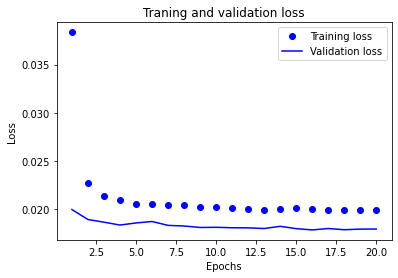

In [ ]:
# 훈련과 검증 손실 그래프
history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

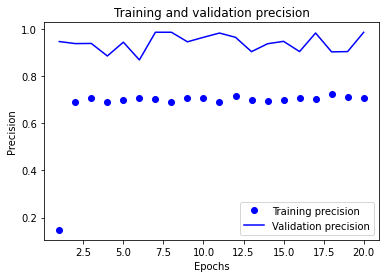

In [ ]:
# 훈련과 검증 pricision 그래프
plt.clf()
precision = history_dict['precision_5']
val_precision = history_dict['val_precision_5']
plt.plot(epochs, precision, 'bo', label='Training precision')
plt.plot(epochs, val_precision, 'b', label = 'Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show() # 규제가 너무 잘 되나보다..